In [293]:
import pandas as pd
import shap
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, ShuffleSplit, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from PIL import Image, ImageOps
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, ndcg_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from PIL import Image, ImageOps
import lime
import lime.lime_tabular

In [294]:
df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)
df.rename(columns={'season': 'Season'}, inplace=True)
df = df[df['make_playoffs'] == 1]

print(list(df.columns))

['Season', 'Team', 'team_id', 'conference', 'max_player', 'champion_share', 'champion', 'Rk', 'rk_season', 'Arena', 'rk_conference', 'top_3_conference', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%', 'defensive_DRB%', 'defensive_FT/FGA', 'Attend.', 'Attend./G', 'make_playoffs', 'overall_record', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG', 'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%', 'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec', 'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_o

In [295]:
data_columns = ['rk_conference', 'top_3_conference', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
                '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG',
                'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%',
                'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec',
                'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_or_less_rec',
                '10pt_or_more_rec', 'pre_all_star_rec', 'post_all_star_rec', 'e_conf_rec', 'w_conf_rec', 'sum_mvp_shares', 'sum_dpoy_shares', 
                'sum_roy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_cpoy_shares', 'sum_all_nba', 'sum_all_defense', 'sum_all_rookie',
                'sum_mvps_won', 'sum_dpoys_won', 'sum_roys_won', 'sum_mips_won', 'sum_cpoys_won', 'sum_all_nba_1st', 'sum_all_def_1st', 'sum_playoff_games',
                'sum_mvp_shares_L3S', 'sum_mvp_shares_L5S', 'sum_champion_shares', 'sum_champions', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs',
                'sum_player_L8S_cs', 'sum_all_nba_1st_L5S', 'team_rating_custom', 'max_player_rating_custom','sum_coach_playoff_games', 'sum_coy_shares',
                'conference_5pt_or_less_rec', 'conference_OR', 'conference_SRS', 'conference_age', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 
                'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%',
                'defensive_DRB%', 'defensive_FT/FGA','overall_record', 'rk_season','sum_franchise_L1S_cs', 'sum_franchise_L3S_cs', 'sum_franchise_L5S_cs', 'sum_franchise_L8S_cs', 'rank_offensive_eFG%', 'rank_2P%', 'rank_sum_all_nba_1st_L5S', 'rank_SRS', 'top_5_offensive_eFG%', 'top_3_2P%', 'top_5_sum_all_nba_1st_L5S', 'top_6_SRS'
                 
               ]

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

invalid value encountered in divide
invalid value encountered in divide


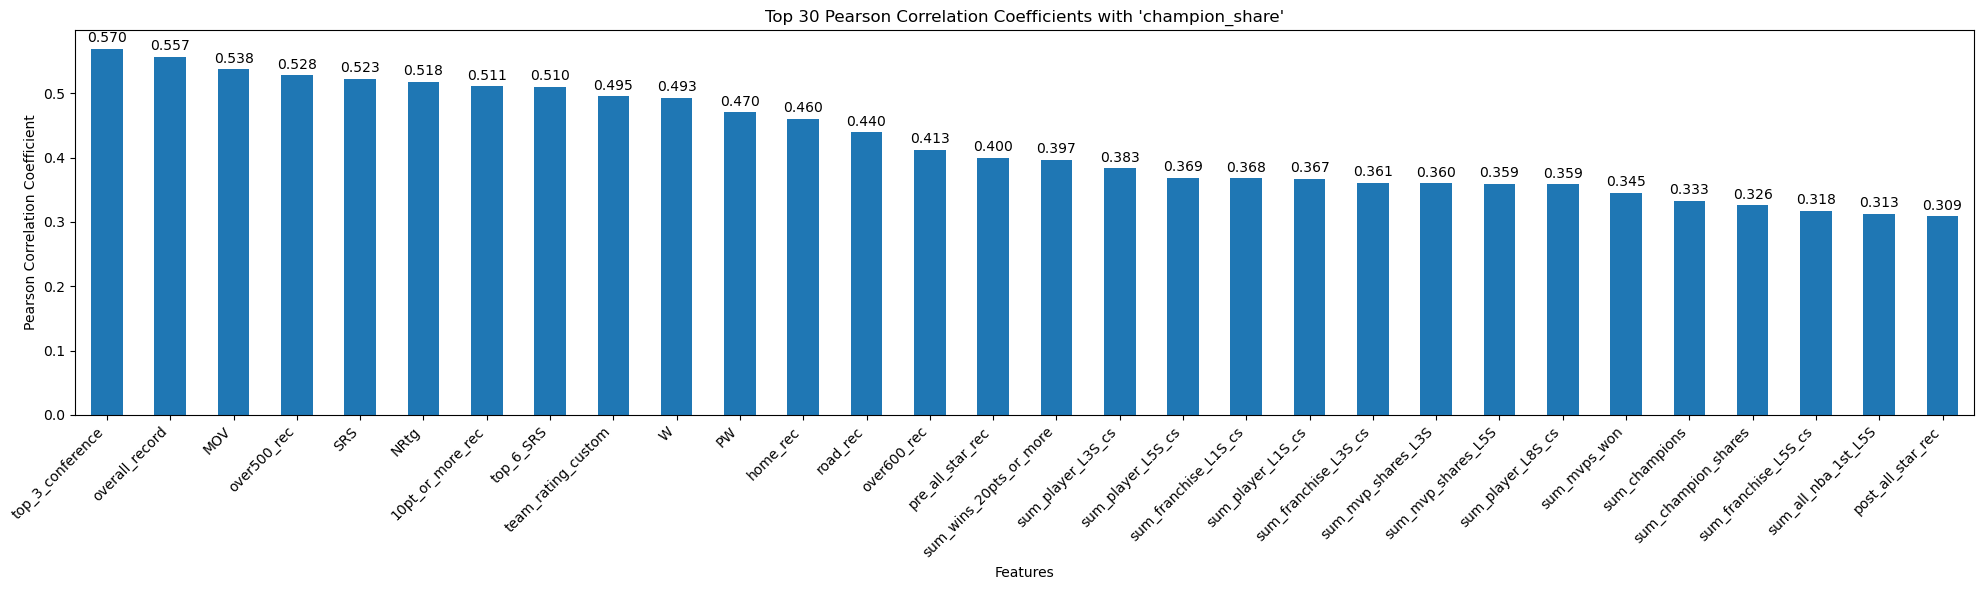

In [296]:

correlations = df[data_columns].corrwith(df['champion_share'])
correlations = correlations.sort_values(ascending=False)

top_correlations = correlations[:30]

plt.figure(figsize=(20, 6))
top_correlations.plot(kind='bar')
plt.title("Top 30 Pearson Correlation Coefficients with 'champion_share'")
plt.xlabel("Features")
plt.ylabel("Pearson Correlation Coefficient")
plt.xticks(rotation=45, ha='right')

for i, val in enumerate(top_correlations):
    plt.text(i, val + 0.01, f'{val:.3f}', ha='center')

plt.tight_layout()
plt.show()

In [297]:
correlation_matrix = data.corr()

correlation_threshold = .65

columns_to_remove = set()
print("Columns to be Removed:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            if feature_i not in columns_to_remove:
                columns_to_remove.add(feature_j)
                #print(f"{feature_j} (correlated with {feature_i}): {correlation:.2f}")

data_filtered = data.drop(columns=columns_to_remove)

Columns to be Removed:


In [47]:
print("Columns in data_filtered:")
print(", ".join(f"'{column}'" for column in data_filtered.columns))

print("\nColumns that were removed:")
print(", ".join(f"'{removed_column}'" for removed_column in columns_to_remove))

Columns in data_filtered:
'rk_conference', 'G', 'MP', 'FG', '3P', 'FT%', 'TRB', 'pso', 'over500_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'pre_all_star_rec', 'sum_mvp_shares', 'sum_dpoy_shares', 'sum_roy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_cpoy_shares', 'sum_all_defense', 'sum_all_rookie', 'sum_cpoys_won', 'sum_champions', 'sum_player_L1S_cs', 'max_player_rating_custom', 'sum_coach_playoff_games', 'conference_5pt_or_less_rec', 'conference_OR', 'conference_age', 'SOS', 'FTr', 'rank_offensive_eFG%', 'rank_sum_all_nba_1st_L5S', 'top_3_2P%', 'top_5_sum_all_nba_1st_L5S'

Columns that were removed:
'TOV', 'sum_mips_won', 'sum_all_nba_1st', 'ORB', 'over600_rec', 'FTA', 'defensive_eFG%', 'w_conf_rec', 'sum_franchise_L1S_cs', 'opp_PTS', 'FGA', 'opp_FGA', 'opp_AST', 'opp_3P', 'opp_MP', 'rank_2P%', 'rank_SRS', 'sum_mvps_won', 'opp_FG', 'sum_mvp_shares_L5S', 'defensive_FT/FGA', 'top_5_offensive_eFG%', 'opp_2P%', 'opp_TRB', 'sum_coy_shares', 'opp_2P

In [48]:
print(list(df.columns))

['Season', 'Team', 'team_id', 'conference', 'max_player', 'champion_share', 'champion', 'Rk', 'rk_season', 'Arena', 'rk_conference', 'top_3_conference', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%', 'defensive_DRB%', 'defensive_FT/FGA', 'Attend.', 'Attend./G', 'make_playoffs', 'overall_record', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG', 'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%', 'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec', 'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_o

In [49]:
#OLD

features = ['conference 5=> rec', 'conference_OR', 'conference_age', 'pso',
            'over600_rec', 'DRtg', 'top_3_conference',
            '20 =< wins', '5 => rec', 'sum_coach_playoff_games', 'sum_coy_shares', 'sum_playoff_games', 'sum_champion', 'sum_mvp_shares', 'team_rating_custom','Age',
            'sum_all_defense', 'sum_all_nba', 'sum_dpoy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'Offense Four Factors|eFG%',
             'sum_L3S_mvp_shares', 'sum_franchise_L1S_cs', 'sum_franchise_L3S_cs', 'sum_franchise_L8S_cs', 'max_player_rating_custom', 
            'FG', 'FGA', 'FG%', '3P', '3P%', '2P', '2P%', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'PF', 'FG_opp', 'PTS_opp', 'SOS', 'ORtg', 'Pace', 'FTr', 'Defense Four Factors|eFG%']

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 49


In [353]:
features = ['top_3_conference', 'FG', '3P', '3P%', '2P', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF',  'opp_3P%','opp_FT%', 'opp_ORB',
            'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_BLK', 'Age', 'pso', 'sum_mvp_shares_L3S', 'top_6_SRS', 'top_5_offensive_eFG%' , 'sum_franchise_L3S_cs', 'sum_playoff_games', 'sum_games_5pts_or_less', 'sum_roy_shares', '3pt_or_less_rec',
            'offensive_eFG%', 'conference_OR', 'defensive_eFG%', 'sum_dpoys_won', 'sum_all_nba_1st_L5S'
                       
           
           ]

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 36


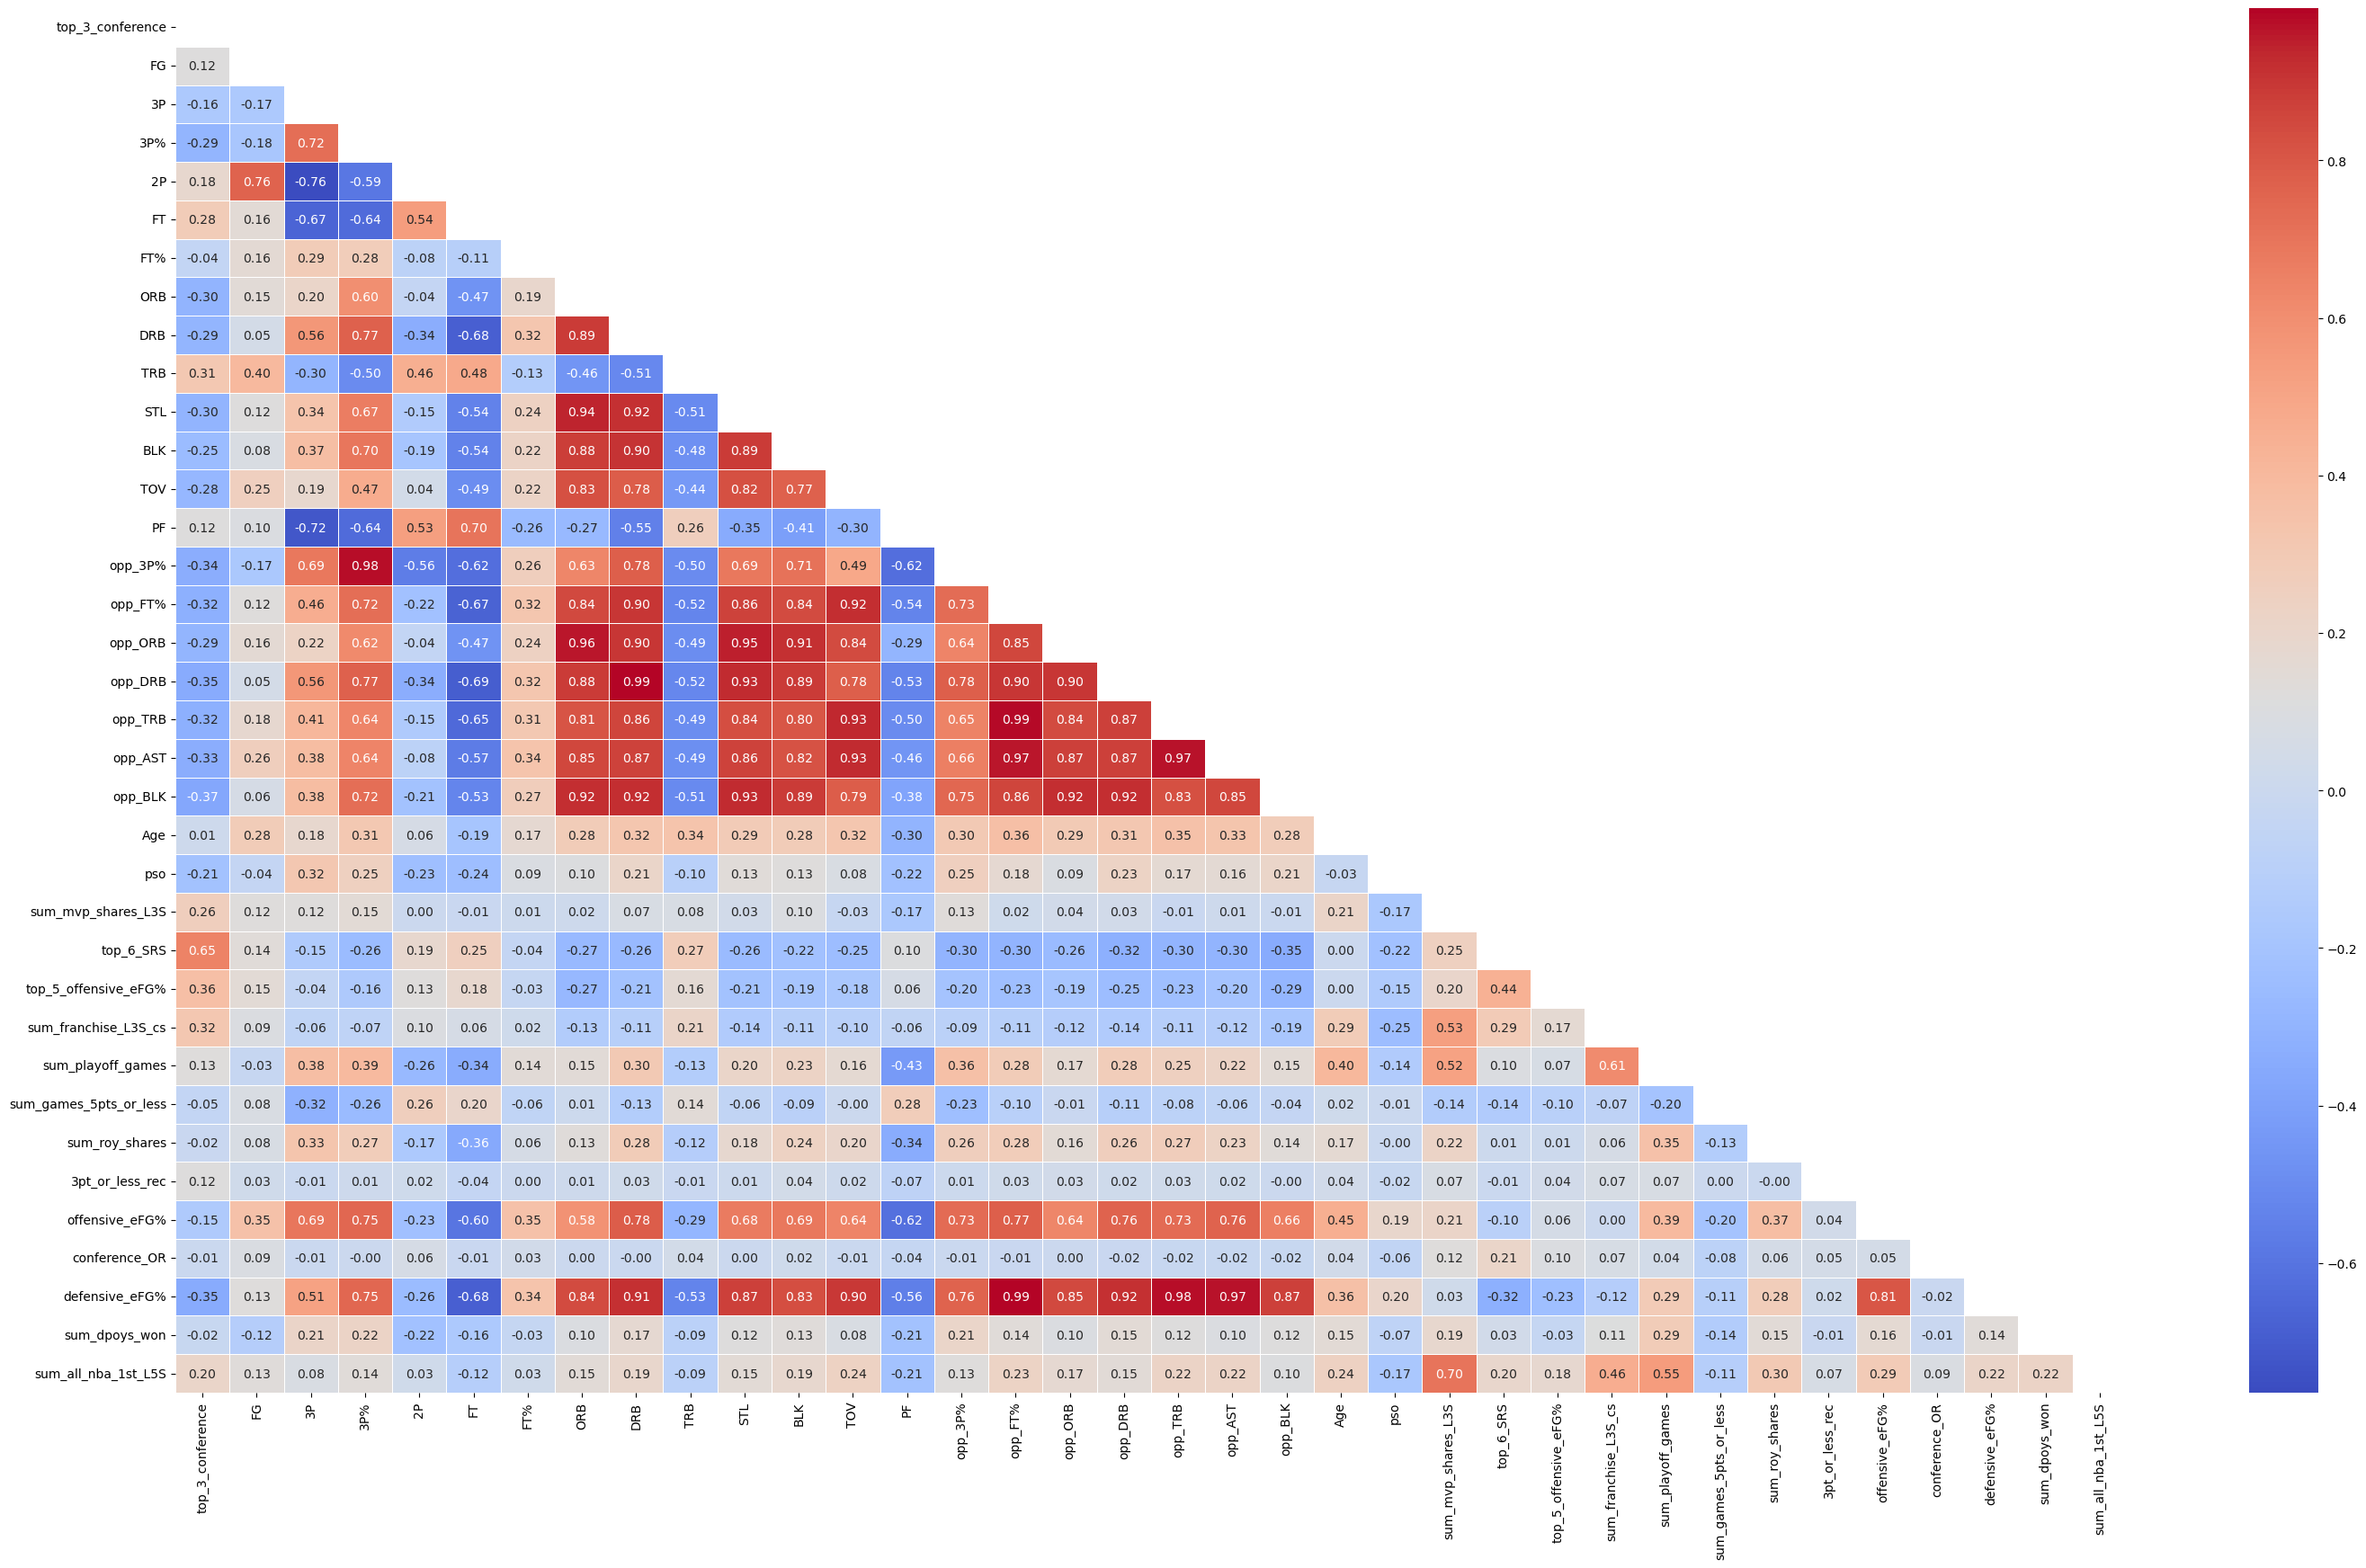

In [354]:
selected_features_data = data[features]
correlation_matrix = selected_features_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(35, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.show()

## Random-Forest Regression:

Results:

    Season                    Team  champion_share  predicted_cs
24    2024         Milwaukee Bucks          0.1250      0.668890
8     2024          Denver Nuggets          0.4375      0.643140
7     2024          Boston Celtics          1.0000      0.588078
4     2024  Minnesota Timberwolves          0.5625      0.550113
11    2024   Oklahoma City Thunder          0.3750      0.477279
26    2024         New York Knicks          0.4375      0.424390
3     2024      Los Angeles Lakers          0.0625      0.280390
19    2024    Los Angeles Clippers          0.1250      0.221464
9     2024          Indiana Pacers          0.5000      0.206357
16    2024      Philadelphia 76ers          0.1250      0.195432
-----------------------------------------------------------------------------

NDCG Scores: 

True NDCG @:  0.7646088959196905
-----------------------------------------------------------------------------



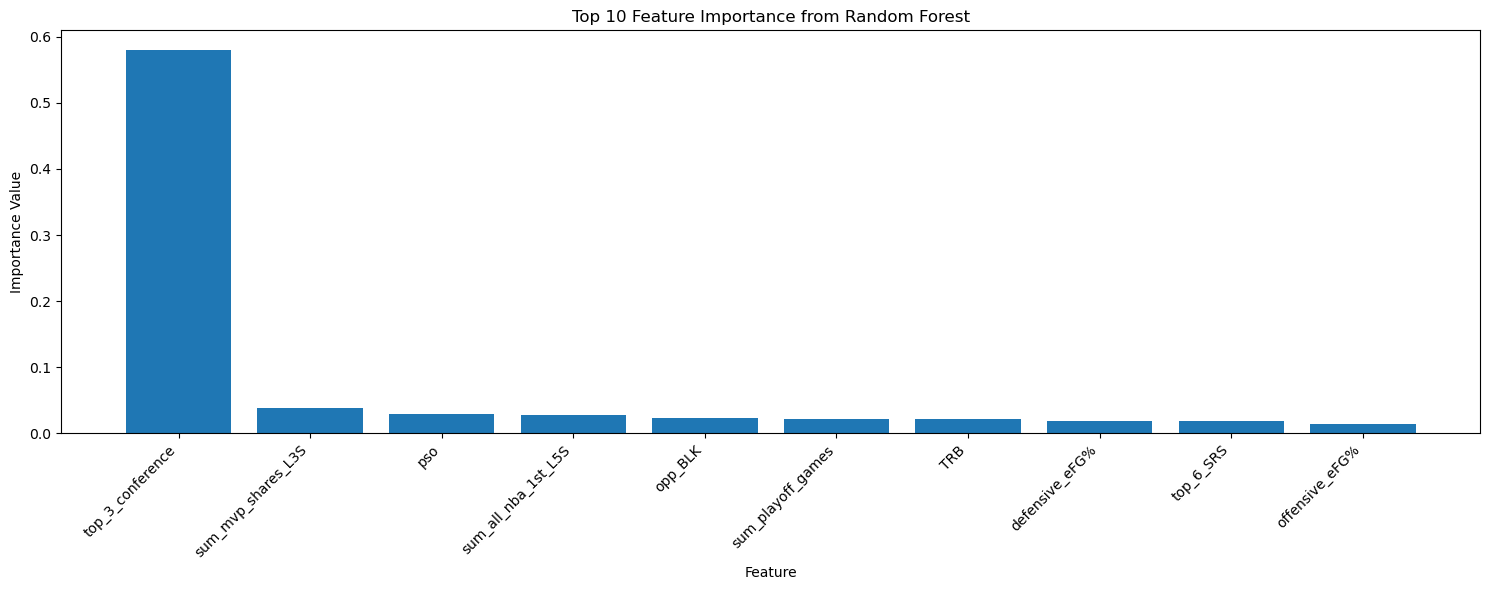

In [355]:
df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)
df.rename(columns={'season': 'Season'}, inplace=True)
df = df[df['make_playoffs'] == 1]

df.drop(df[df['Season'] < 1983].index, inplace = True)

train = df[df["Season"] < 2024].copy()
test = df[df["Season"] == 2024].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features] = sc.transform(train[features])
test[features] = sc.transform(test[features])

rf = RandomForestRegressor(n_estimators=25, random_state=5, min_samples_split=3, max_depth=5)
rf.fit(train[features], train["champion_share"])

predictions = rf.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

print("Results:")
print("=============================================================================\n")
print(frame.head(10))
print("-----------------------------------------------------------------------------\n")

def ndcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        dcg = np.sum(r / np.log2(np.arange(2, r.size + 2)))
        idcg = np.sum(np.sort(r)[::-1] / np.log2(np.arange(2, r.size + 2)))
        return dcg / idcg
    return 0.

def calculate_ndcg(df, k=14):
    true_relevance = df['champion_share'].values
    return ndcg_at_k(true_relevance, k)

ndcg_score_true = calculate_ndcg(frame, k=14)

print("NDCG Scores: ")
print("=============================================================================\n")
print("True NDCG @: ", ndcg_score_true)
print("-----------------------------------------------------------------------------\n")

feature_importances = rf.feature_importances_
feature_importance_dict = dict(zip(features, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_features = sorted_feature_importance[:10]
features_names = [x[0] for x in top_features]
importances = [x[1] for x in top_features]

plt.figure(figsize=(15, 6))
plt.bar(features_names, importances)
plt.title('Top 10 Feature Importance from Random Forest')
plt.ylabel('Importance Value')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

predictions = rf.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
rf_reg_frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
rf_reg_frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

In [56]:
actual = frame.sort_values("champion_share", ascending=False)
predicted = frame.sort_values("predicted_cs", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(1) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame):
    actual = frame.sort_values("champion_share", ascending=False).head(1) #HEAD

    predicted = frame.sort_values("predicted_cs", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame)
print("=============================================================================\n")
print("AP Champion: ", ap)

Ranking Accuracy (Champion):

   Season_x            Team  champion_share_x  predicted_cs_x  Rank  Season_y  champion_share_y  predicted_cs_y  Predicted Rank
0      2024  Boston Celtics               1.0         0.69662     1      2024               1.0         0.69662               1

AP Champion:  1.0


In [57]:

rf_reg_combined_predictions = pd.DataFrame(columns=["Season", "Team/Season", "Team", "predicted_cs", "champion_share"])

all_predictions = []
aps = []
ndcgs = []

backtest_seasons = [2024,2023,2022,2021,2020]
#backtest_seasons = [2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010]

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    rf.fit(train[features], train['champion_share'])
    predictions = rf.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
    frame = pd.concat([test[["Team", "champion_share", "Season"]], predictions_df], axis=1)

    frame['Team/Season'] = frame['Team'] + ' ' + frame['Season'].astype(str)

    # Append the predictions for the current season to the combined predictions DataFrame
    rf_reg_combined_predictions = pd.concat([rf_reg_combined_predictions, frame], ignore_index=True)

    if not frame.empty:
        all_predictions.append(frame)
        ap = find_ap(frame)
        aps.append(ap)

        ndcg = ndcg_score(frame["champion_share"].values.reshape(1, -1), predictions.reshape(1, -1))
        ndcgs.append(ndcg)

        reciprocal_ap = 1 / ap
        print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)} | NDCG: {round(ndcg, 2)}")
    else:
        print(f"No data for Season {season}")

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted_cs", ascending=False).head(10)

    print(f"\nTop 5 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted_cs", "champion_share"]])

average_ndcg = np.mean(ndcgs)
average_ap = np.mean(aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_ndcg = 1.0 / average_ndcg

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"Average Champion Rank: {round(reciprocal_average_ap, 2)} | Reciprocal NDCG: {round(reciprocal_ndcg, 2)}")
print(f"Min Champion Rank: {round(reciprocal_min_ap, 2)}")
print(f"Max Champion Rank: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

rf_reg_combined_predictions.to_csv("rf_reg_nba_preds.csv", index=False)

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Champion AP for Season 2024: 1.0 | Reciprocal: 1.0 | NDCG: 0.9
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0 | NDCG: 0.9
Champion AP for Season 2022: 0.33 | Reciprocal: 3.0 | NDCG: 0.84
Champion AP for Season 2021: 0.2 | Reciprocal: 5.0 | NDCG: 0.82
Champion AP for Season 2020: 0.5 | Reciprocal: 2.0 | NDCG: 0.86

Top 5 Predicted Teams for Season 2024:
                      Team  predicted_cs  champion_share
7           Boston Celtics      0.696620          1.0000
8           Denver Nuggets      0.661416          0.4375
24         Milwaukee Bucks      0.608382          0.1250
4   Minnesota Timberwolves      0.558995          0.5625
26         New York Knicks      0.485177          0.4375
11   Oklahoma City Thunder      0.481439          0.3750
3       Los Angeles Lakers      0.423760          0.0625
19    Los Angeles Clippers      0.249080          0.1250
16      Philadelphia 76ers      0.210755          0.1250
9           Indiana Pacers      0.205895          0.5000

Top 5 Predict

Top 10 Features:
['top_3_conference', 'team_rating_custom', 'ORB', 'over600_rec', 'max_player_rating_custom', 'SOS', 'pso', 'sum_franchise_L1S_cs', 'sum_playoff_games', 'sum_champion']


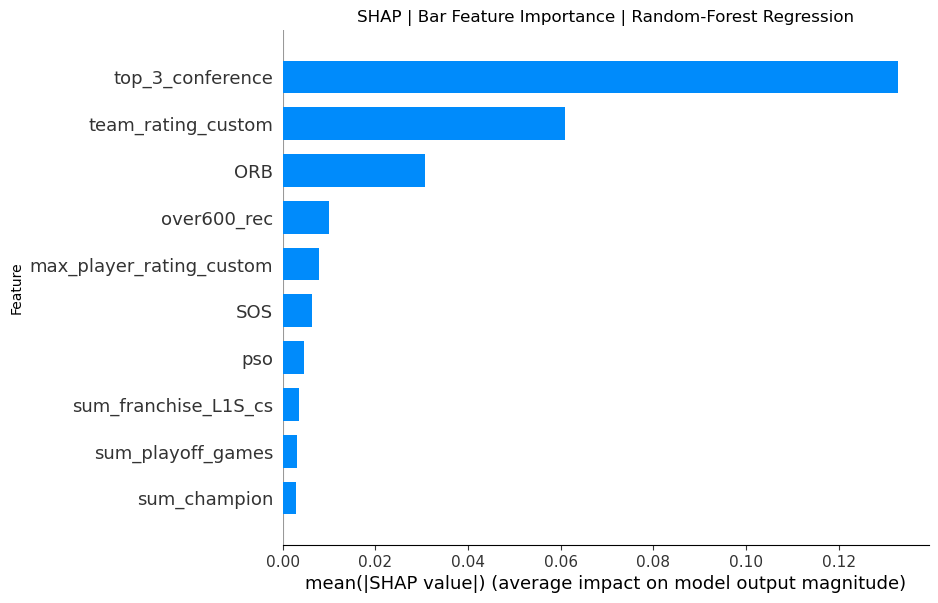

In [60]:
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, plot_type="bar", show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Bar Feature Importance | Random-Forest Regression')

plt.savefig("rf_shap_bar.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("rf_shap_bar.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rf_shap_bar.png")

plt.ylabel("Feature")
plt.show()

Top 10 Features:
['top_3_conference', 'team_rating_custom', 'ORB', 'over600_rec', 'max_player_rating_custom', 'SOS', 'pso', 'sum_franchise_L1S_cs', 'sum_playoff_games', 'sum_champion']


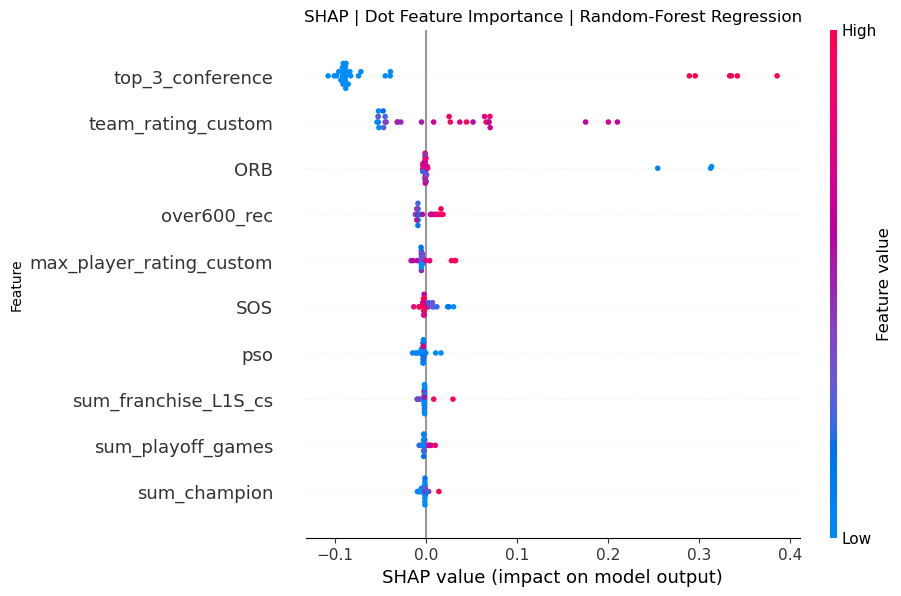

In [61]:

explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Dot Feature Importance | Random-Forest Regression')

plt.savefig("rf_shap_dot.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("rf_shap_dot.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rf_shap_dot.png")

plt.ylabel("Feature")
plt.show()

## Ridge Regression:

In [356]:
df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)
df.rename(columns={'season': 'Season'}, inplace=True)
df = df[df['make_playoffs'] == 1]

print(list(df.columns))

['Season', 'Team', 'team_id', 'conference', 'max_player', 'champion_share', 'champion', 'Rk', 'rk_season', 'Arena', 'rk_conference', 'top_3_conference', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%', 'defensive_DRB%', 'defensive_FT/FGA', 'Attend.', 'Attend./G', 'make_playoffs', 'overall_record', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG', 'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%', 'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec', 'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_o

In [357]:
data_columns = ['rk_conference', 'top_3_conference', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
                '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG',
                'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%',
                'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec',
                'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_or_less_rec',
                '10pt_or_more_rec', 'pre_all_star_rec', 'post_all_star_rec', 'e_conf_rec', 'w_conf_rec', 'sum_mvp_shares', 'sum_dpoy_shares', 
                'sum_roy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_cpoy_shares', 'sum_all_nba', 'sum_all_defense', 'sum_all_rookie',
                'sum_mvps_won', 'sum_dpoys_won', 'sum_roys_won', 'sum_mips_won', 'sum_cpoys_won', 'sum_all_nba_1st', 'sum_all_def_1st', 'sum_playoff_games',
                'sum_mvp_shares_L3S', 'sum_mvp_shares_L5S', 'sum_champion_shares', 'sum_champions', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs',
                'sum_player_L8S_cs', 'sum_all_nba_1st_L5S', 'team_rating_custom', 'max_player_rating_custom','sum_coach_playoff_games', 'sum_coy_shares',
                'conference_5pt_or_less_rec', 'conference_OR', 'conference_SRS', 'conference_age', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 
                'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%',
                'defensive_DRB%', 'defensive_FT/FGA','overall_record', 'rk_season','sum_franchise_L1S_cs', 'sum_franchise_L3S_cs', 'sum_franchise_L5S_cs', 'sum_franchise_L8S_cs',
                 'rank_offensive_eFG%', 'rank_2P%', 'rank_sum_all_nba_1st_L5S', 'rank_SRS', 'top_5_offensive_eFG%', 'top_3_2P%', 'top_5_sum_all_nba_1st_L5S', 'top_6_SRS'
               ]

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

In [358]:
correlation_matrix = data.corr()

correlation_threshold = .75

columns_to_remove = set()
#print("Columns to be Removed:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            if feature_i not in columns_to_remove:
                columns_to_remove.add(feature_j)
                #print(f"{feature_j} (correlated with {feature_i}): {correlation:.2f}")

data_filtered = data.drop(columns=columns_to_remove)

In [359]:
print("Columns in data_filtered:")
print(", ".join(f"'{column}'" for column in data_filtered.columns))

print("\nColumns that were removed:")
print(", ".join(f"'{removed_column}'" for removed_column in columns_to_remove))

Columns in data_filtered:
'rk_conference', 'G', 'MP', 'FG', 'FGA', '3P', '3P%', '2P%', 'FT', 'FT%', 'ORB', 'TRB', 'AST', 'PF', 'pso', 'over500_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_or_less_rec', 'pre_all_star_rec', 'post_all_star_rec', 'e_conf_rec', 'sum_mvp_shares', 'sum_dpoy_shares', 'sum_roy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_cpoy_shares', 'sum_all_defense', 'sum_all_rookie', 'sum_cpoys_won', 'sum_playoff_games', 'sum_mvp_shares_L3S', 'sum_champions', 'sum_player_L1S_cs', 'sum_all_nba_1st_L5S', 'max_player_rating_custom', 'sum_coach_playoff_games', 'conference_5pt_or_less_rec', 'conference_OR', 'conference_age', 'SOS', 'DRtg', 'sum_franchise_L3S_cs', 'rank_offensive_eFG%', 'rank_sum_all_nba_1st_L5S', 'top_5_offensive_eFG%', 'top_3_2P%', 'top_5_sum_all_nba_1st_L5S', 'top_6_SRS'

Columns that were removed:
'TOV', 'sum_mips_won', 'sum_all_nba_1st', 'over600_rec', 'FTA', 'defensive_eFG%', 'w_conf_rec', '

In [457]:
features = ['top_3_conference', 'FG', '3P', '3P%', '2P', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF',  'opp_3P%','opp_FT%', 'opp_ORB',
            'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_BLK', 'Age', 'pso', 'sum_mvp_shares_L3S', 'top_6_SRS', 'top_5_offensive_eFG%' , 'sum_franchise_L3S_cs', 'sum_playoff_games', 'sum_games_5pts_or_less', 'sum_roy_shares', '3pt_or_less_rec',
            'offensive_eFG%', 'conference_OR', 'defensive_eFG%', 'sum_dpoys_won'
           ]

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 35


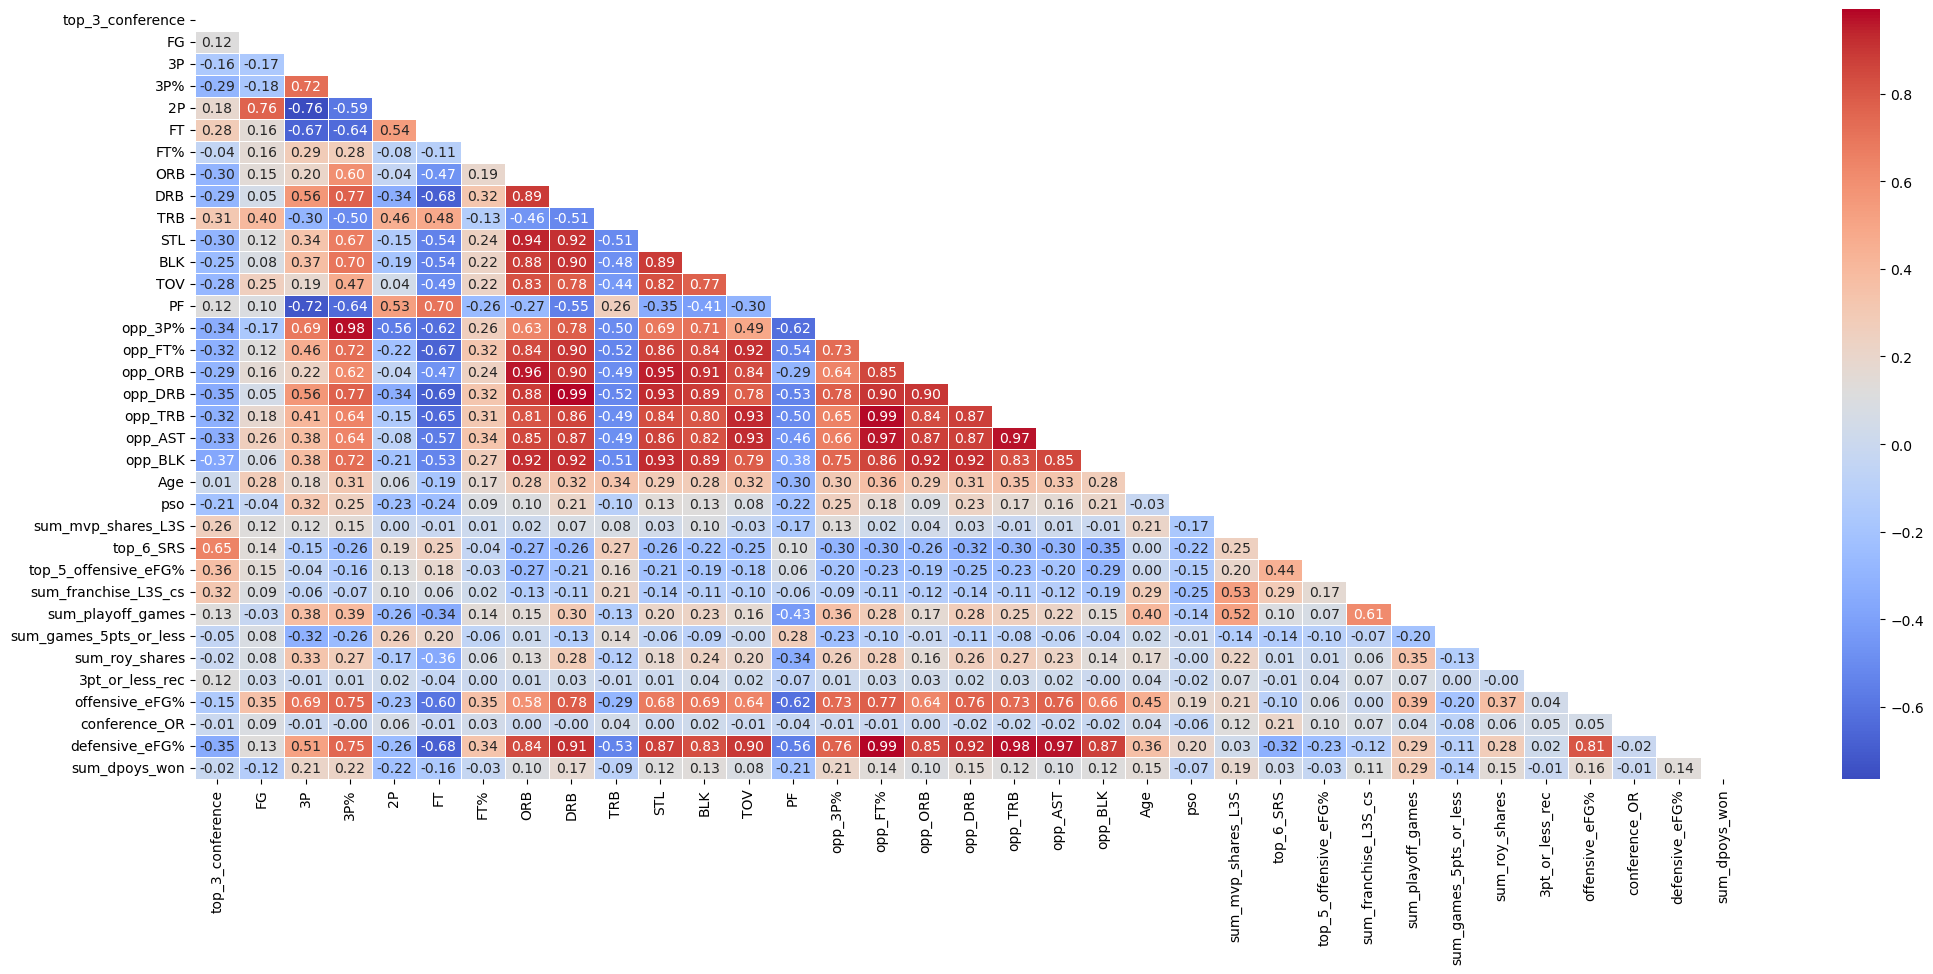

In [458]:
selected_features_data = data[features]
correlation_matrix = selected_features_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.show()

Results:

    Season                    Team  champion_share  predicted_cs
7     2024          Boston Celtics          1.0000      0.656379
8     2024          Denver Nuggets          0.4375      0.564955
24    2024         Milwaukee Bucks          0.1250      0.523289
11    2024   Oklahoma City Thunder          0.3750      0.469314
4     2024  Minnesota Timberwolves          0.5625      0.457850
26    2024         New York Knicks          0.4375      0.432321
16    2024      Philadelphia 76ers          0.1250      0.201073
9     2024          Indiana Pacers          0.5000      0.152752
5     2024              Miami Heat          0.0625      0.144218
18    2024           Orlando Magic          0.1875      0.125624
21    2024     Cleveland Cavaliers          0.3125      0.121189
19    2024    Los Angeles Clippers          0.1250      0.109546
23    2024            Phoenix Suns          0.0000      0.108220
22    2024    New Orleans Pelicans          0.0000      0.100123
3     2024     

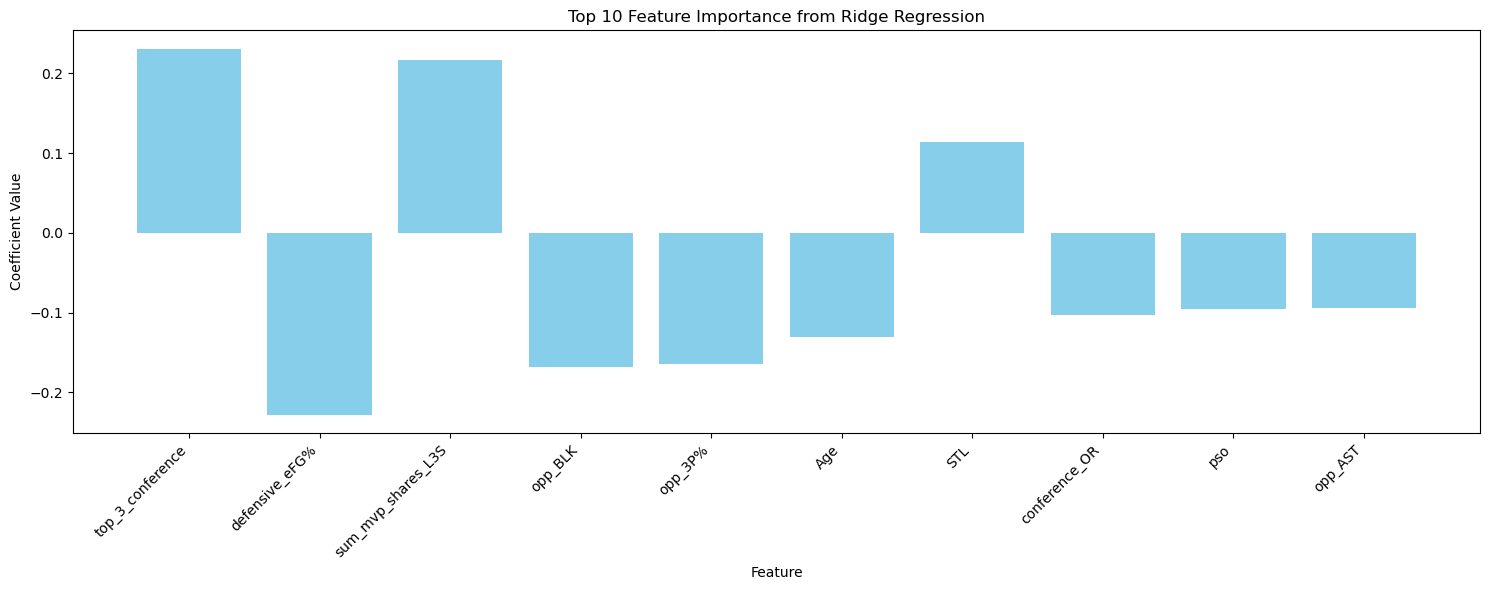

In [459]:
df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)
df.rename(columns={'season': 'Season'}, inplace=True)
df = df[df['make_playoffs'] == 1]

df.drop(df[df['Season'] < 1985].index, inplace = True)

train = df[df["Season"] < 2024].copy()
test = df[df["Season"] == 2024].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features] = sc.transform(train[features])
test[features] = sc.transform(test[features])

rig = Ridge(alpha=.5)
rig.fit(train[features], train["champion_share"])

predictions = rig.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

print("Results:")
print("=============================================================================\n")
print(frame.head(16))
print("-----------------------------------------------------------------------------\n")

def ndcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        dcg = np.sum(r / np.log2(np.arange(2, r.size + 2)))
        idcg = np.sum(np.sort(r)[::-1] / np.log2(np.arange(2, r.size + 2)))
        return dcg / idcg
    return 0.

def calculate_ndcg(df, k=16):
    true_relevance = df['champion_share'].values
    return ndcg_at_k(true_relevance, k)

ndcg_score_true = calculate_ndcg(frame, k=16)

print("NDCG Scores: ")
print("=============================================================================\n")
print("True NDCG @: ", ndcg_score_true)
print("-----------------------------------------------------------------------------\n")

coefficients = rig.coef_
feature_coefficients = dict(zip(features, coefficients))
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

top_features = sorted_feature_coefficients[:10]
features_names = [x[0] for x in top_features]
coeff_values = [x[1] for x in top_features]

plt.figure(figsize=(15, 6))
plt.bar(features_names, coeff_values, color='skyblue')
plt.title('Top 10 Feature Importance from Ridge Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

predictions = rig.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
rig_reg_frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
rig_reg_frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

In [460]:
actual = frame.sort_values("champion_share", ascending=False)
predicted = frame.sort_values("predicted_cs", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(1) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame):
    actual = frame.sort_values("champion_share", ascending=False).head(1) #HEAD

    predicted = frame.sort_values("predicted_cs", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame)
print("=============================================================================\n")
print("AP Champion: ", ap)

Ranking Accuracy (Champion):

   Season_x            Team  champion_share_x  predicted_cs_x  Rank  Season_y  champion_share_y  predicted_cs_y  Predicted Rank
0      2024  Boston Celtics               1.0        0.656379     1      2024               1.0        0.656379               1

AP Champion:  1.0


In [461]:

rig_reg_combined_predictions = pd.DataFrame(columns=["Season", "Team/Season", "Team", "predicted_cs", "champion_share"])

all_predictions = []
aps = []
ndcgs = []

backtest_seasons = [2024,2023,2022,2021, 2020]
#backtest_seasons = list(range(2024, 1959, -1))

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    rig.fit(train[features], train['champion_share'])
    predictions = rig.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
    frame = pd.concat([test[["Team", "champion_share", "Season"]], predictions_df], axis=1)

    frame['Team/Season'] = frame['Team'] + ' ' + frame['Season'].astype(str)

    rig_reg_combined_predictions = pd.concat([rig_reg_combined_predictions, frame], ignore_index=True)

    if not frame.empty:
        all_predictions.append(frame)
        ap = find_ap(frame)
        aps.append(ap)

        ndcg = ndcg_score(frame["champion_share"].values.reshape(1, -1), predictions.reshape(1, -1))
        ndcgs.append(ndcg)

        reciprocal_ap = 1 / ap
        print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)} | NDCG: {round(ndcg, 2)}")
    else:
        print(f"No data for Season {season}")

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted_cs", ascending=False).head(5)

    print(f"\nTop 5 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted_cs", "champion_share"]])

average_ndcg = np.mean(ndcgs)
average_ap = np.mean(aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_ndcg = 1.0 / average_ndcg

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"Average Champion Rank: {round(reciprocal_average_ap, 2)} | Reciprocal NDCG: {round(reciprocal_ndcg, 2)}")
print(f"Min Champion Rank: {round(reciprocal_min_ap, 2)}")
print(f"Max Champion Rank: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

rig_reg_combined_predictions.to_csv("rig_reg_nba_preds.csv", index=False)

Champion AP for Season 2024: 1.0 | Reciprocal: 1.0 | NDCG: 0.9
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0 | NDCG: 0.87
Champion AP for Season 2022: 1.0 | Reciprocal: 1.0 | NDCG: 0.93
Champion AP for Season 2021: 1.0 | Reciprocal: 1.0 | NDCG: 0.94
Champion AP for Season 2020: 1.0 | Reciprocal: 1.0 | NDCG: 0.93

Top 5 Predicted Teams for Season 2024:
                      Team  predicted_cs  champion_share
7           Boston Celtics      0.656379          1.0000
8           Denver Nuggets      0.564955          0.4375
24         Milwaukee Bucks      0.523289          0.1250
11   Oklahoma City Thunder      0.469314          0.3750
4   Minnesota Timberwolves      0.457850          0.5625

Top 5 Predicted Teams for Season 2023:
                  Team  predicted_cs  champion_share
37      Denver Nuggets      0.647997          1.0000
32     Milwaukee Bucks      0.642102          0.0625
46      Boston Celtics      0.591846          0.6875
55  Philadelphia 76ers      0.553522          0

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


#### Features/Train/Params

features = ['top_3_conference', 'FG', '3P', '3P%', '2P', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF',  'opp_3P%','opp_FT%', 'opp_ORB',
            'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_BLK', 'Age', 'pso', 'sum_mvp_shares_L3S', 'top_6_SRS', 'top_5_offensive_eFG%' , 'sum_franchise_L3S_cs', 'sum_playoff_games', 'sum_games_5pts_or_less', 'sum_roy_shares', '3pt_or_less_rec',
            'offensive_eFG%', 'conference_OR', 'defensive_eFG%', 'sum_dpoys_won'
           
           ]

num_features = len(features)

print(f"Number of features: {num_features}")

#===============================================================================================

df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)
df.rename(columns={'season': 'Season'}, inplace=True)
df = df[df['make_playoffs'] == 1]

df.drop(df[df['Season'] < 1985].index, inplace = True)

train = df[df["Season"] < 2024].copy()
test = df[df["Season"] == 2024].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features] = sc.transform(train[features])
test[features] = sc.transform(test[features])

rig = Ridge(alpha=0.5)
rig.fit(train[features], train["champion_share"])

#===============================================================================================

Champion AP for Season 2024: 1.0 | Reciprocal: 1.0 | NDCG: 0.9
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0 | NDCG: 0.87
Champion AP for Season 2022: 1.0 | Reciprocal: 1.0 | NDCG: 0.93
Champion AP for Season 2021: 1.0 | Reciprocal: 1.0 | NDCG: 0.94
Champion AP for Season 2020: 1.0 | Reciprocal: 1.0 | NDCG: 0.93


Top 10 Features:
['top_3_conference', 'defensive_eFG%', 'sum_mvp_shares_L3S', '3P', 'top_6_SRS', 'offensive_eFG%', 'DRB', 'top_5_offensive_eFG%', 'conference_OR', 'opp_BLK']


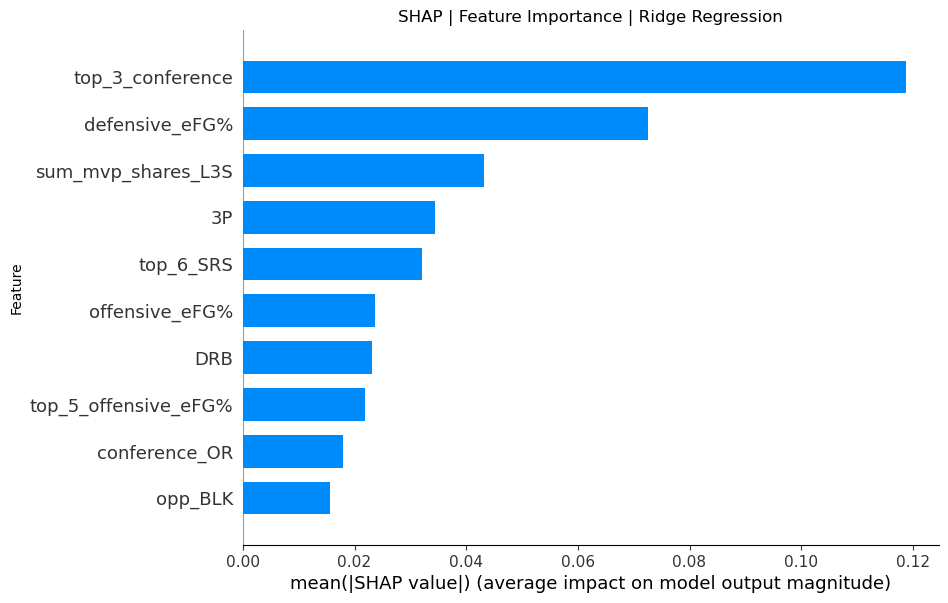

In [462]:
explainer = shap.LinearExplainer(rig, train[features])
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, plot_type="bar", show=False)
plt.gcf().set_size_inches(10, 6)
plt.title('SHAP | Feature Importance | Ridge Regression')

plt.savefig("ridge_shap_bar.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("ridge_shap_bar.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("ridge_shap_bar.png")

plt.ylabel("Feature")
plt.show()

Top 10 Features:
['top_3_conference', 'defensive_eFG%', 'sum_mvp_shares_L3S', '3P', 'top_6_SRS', 'offensive_eFG%', 'DRB', 'top_5_offensive_eFG%', 'conference_OR', 'opp_BLK']


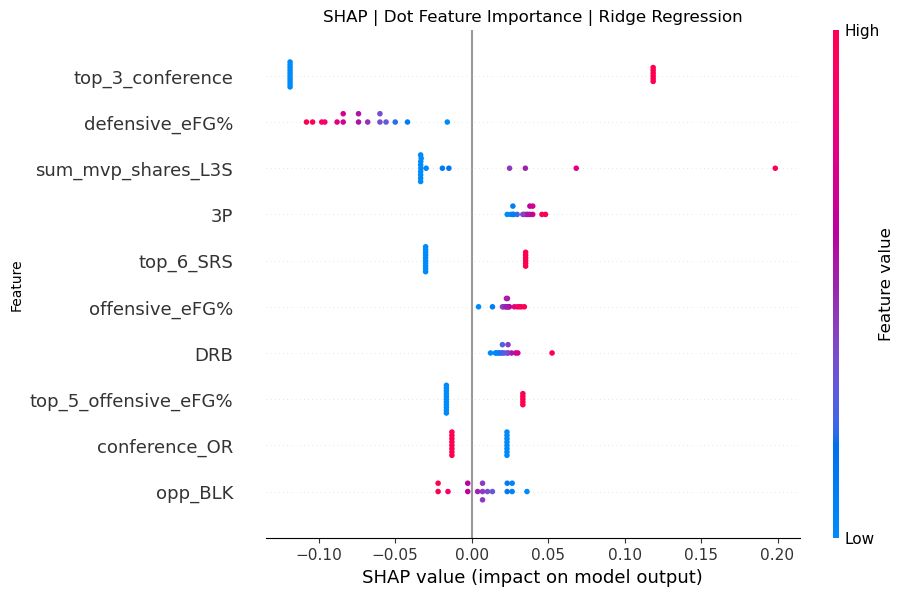

In [463]:

explainer = shap.LinearExplainer(rig, train[features])
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Dot Feature Importance | Ridge Regression')

plt.savefig("rig_shap_dot.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("rig_shap_dot.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rig_shap_dot.png")

plt.ylabel("Feature")
plt.show()